# Introduction

The objective of this notebook is to find the amount of insurance claimed by a particular individial.
We will use Regression Techniques to get the intended results.

### Observations

We can see that the data contains both Categorical and Numeric features. The given data doesn't contain any missing values.

In [266]:
import pandas as pd
import numpy as np

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

In [650]:
data=pd.read_csv(r'C:\Users\gnr04\Desktop\Srikanth\MS\Machine Leanrning and Data Mining\Assignment\CE802_P3_Data\CE802_P3_Data.csv')

In [269]:
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.32,5.72,-13.83,High,UK,0.03,-200.46,122.09,-2.96,6,2.67,8,607.14,19.19,10523.40,-635.80,1051.99
1,-29.38,8.20,-11.07,Medium,UK,56.97,-427.78,74.25,-22.94,4,3.84,10,867.03,12.65,10037.04,-469.73,816.64
2,2.46,20.32,-7.59,Low,Rest,45.00,-329.02,96.98,-10.90,4,13.14,8,-153.66,13.01,15100.28,-662.31,3241.77
3,16.33,2.76,-8.40,High,Rest,0.12,-196.88,42.45,-12.16,12,1.29,6,1461.87,9.19,22518.15,-1100.35,0.00
4,-14.93,9.98,-5.28,Medium,USA,557.61,-249.50,76.25,-20.54,8,2.58,2,-433.89,18.44,20111.46,-752.48,0.00


In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   object 
 4   F5      1500 non-null   object 
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   int64  
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   int64  
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  Target  1500 non-null   float64
dtypes: float64(13), int64(2), object(2)
memory usage: 199.3+ KB


In [271]:
#There are 5 distinct categories.
data['F4'].value_counts()

Very low     312
Low          310
High         301
Very high    290
Medium       287
Name: F4, dtype: int64

In [272]:
#There are 4 distinct values.
data['F5'].value_counts()

Rest      407
USA       380
Europe    360
UK        353
Name: F5, dtype: int64

In [273]:
#No Null values found.
data.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
Target    0
dtype: int64

In [651]:
#Using the get_dummies function to transform the categorical values to numeric.

data=pd.get_dummies(data, columns=["F4", "F5"],drop_first=True)

In [652]:
data['TARGET']=data['Target']

In [653]:
del data['Target']

In [654]:
data.head()

,F1,F2,F3,F6,F7,F8,F9,F10,F11,F12,...,F15,F16,F4_Low,F4_Medium,F4_Very high,F4_Very low,F5_Rest,F5_UK,F5_USA,TARGET
0,-39.32,5.72,-13.83,0.03,-200.46,122.09,-2.96,6,2.67,8,...,10523.40,-635.80,0,0,0,0,0,1,0,1051.99
1,-29.38,8.20,-11.07,56.97,-427.78,74.25,-22.94,4,3.84,10,...,10037.04,-469.73,0,1,0,0,0,1,0,816.64
2,2.46,20.32,-7.59,45.00,-329.02,96.98,-10.90,4,13.14,8,...,15100.28,-662.31,1,0,0,0,1,0,0,3241.77
3,16.33,2.76,-8.40,0.12,-196.88,42.45,-12.16,12,1.29,6,...,22518.15,-1100.35,0,0,0,0,1,0,0,0.00
4,-14.93,9.98,-5.28,557.61,-249.50,76.25,-20.54,8,2.58,2,...,20111.46,-752.48,0,1,0,0,0,0,1,0.00


# Data Analysis
Now that we have converted the categorical variable to numeric type, it is time to do some data analysis before jumping to the model building.

## Assumtions of Linear Regression.
1. The data contains no outliers.
2. The data is linearly distributed.
3. The data shouldn't be multicollinear.
4. The number of observations must be greater than the number of features.


## Outlier Detection and Removal

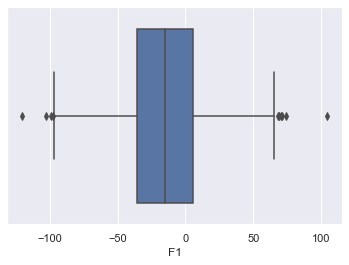

In [278]:
# Using BoxPlot to check if the features contains Outliers
# I have checked 2-3 features and came to the conclution that the data contains the outliers. 
#In this particular example, we can see that the points less than -100 and the points after 65 are outliers.


import seaborn as sns

sns.boxplot(x=data['F1'])

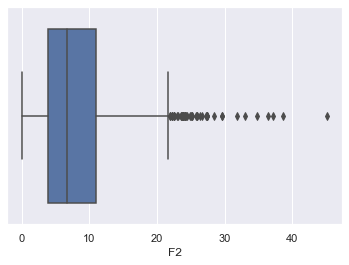

In [279]:
sns.boxplot(x=data['F2'])

### Using Z score to find and discard the the outliers from the data

In [655]:
# I will take the Z score of all the features and eliminate the outliers.

from scipy import stats

z = np.abs(stats.zscore(data))
print(z)
len(z)

[[0.82291097 0.41115498 0.52808163 ... 1.8025792  0.58248237 0.1189664 ]
 [0.48988654 0.01562806 0.22535171 ... 1.8025792  0.58248237 0.09656195]
 [0.57686376 2.10135809 0.15635123 ... 0.55476064 0.58248237 2.12431875]
 ...
 [0.23827552 0.43868937 1.00531122 ... 0.55476064 0.58248237 0.1360365 ]
 [0.67000339 1.04444595 1.18958161 ... 0.55476064 1.71679015 0.8444229 ]
 [0.81889055 2.3663766  0.80119667 ... 1.8025792  0.58248237 0.97677565]]


1500

In [656]:
# Usually a Z-Score of more than 3 and less than -3  are considered as outliers.

np.where(z>3),np.where(z<-3)

((array([  11,   21,   30,   63,   65,   78,  100,  111,  138,  140,  144,
          157,  158,  177,  182,  200,  253,  257,  270,  272,  272,  282,
          293,  299,  302,  302,  303,  360,  372,  381,  393,  407,  417,
          420,  438,  442,  445,  446,  448,  467,  471,  481,  482,  498,
          525,  534,  562,  564,  602,  612,  614,  619,  622,  624,  626,
          628,  634,  645,  655,  676,  680,  686,  691,  704,  705,  718,
          722,  727,  732,  760,  778,  785,  791,  802,  802,  816,  834,
          839,  846,  852,  861,  889,  905,  911,  916,  929,  955,  957,
          974,  978,  998, 1000, 1004, 1017, 1027, 1051, 1055, 1067, 1083,
         1090, 1100, 1103, 1112, 1115, 1139, 1139, 1148, 1159, 1186, 1214,
         1223, 1262, 1262, 1266, 1268, 1278, 1301, 1308, 1321, 1330, 1333,
         1398, 1404, 1415, 1416, 1416, 1420, 1439, 1453, 1465, 1480, 1482,
         1490, 1493, 1495], dtype=int64),
  array([ 4,  8,  4,  8, 11,  8,  4,  9,  4, 11, 12,  3, 1

In [657]:
#The Index values where the Z Score is greater than 3
np.where(z>3)[0]

array([  11,   21,   30,   63,   65,   78,  100,  111,  138,  140,  144,
        157,  158,  177,  182,  200,  253,  257,  270,  272,  272,  282,
        293,  299,  302,  302,  303,  360,  372,  381,  393,  407,  417,
        420,  438,  442,  445,  446,  448,  467,  471,  481,  482,  498,
        525,  534,  562,  564,  602,  612,  614,  619,  622,  624,  626,
        628,  634,  645,  655,  676,  680,  686,  691,  704,  705,  718,
        722,  727,  732,  760,  778,  785,  791,  802,  802,  816,  834,
        839,  846,  852,  861,  889,  905,  911,  916,  929,  955,  957,
        974,  978,  998, 1000, 1004, 1017, 1027, 1051, 1055, 1067, 1083,
       1090, 1100, 1103, 1112, 1115, 1139, 1139, 1148, 1159, 1186, 1214,
       1223, 1262, 1262, 1266, 1268, 1278, 1301, 1308, 1321, 1330, 1333,
       1398, 1404, 1415, 1416, 1416, 1420, 1439, 1453, 1465, 1480, 1482,
       1490, 1493, 1495], dtype=int64)

In [659]:
#These are the datapoints which are outliers.

data.iloc[np.where(z>3)[0]].head()

,F1,F2,F3,F6,F7,F8,F9,F10,F11,F12,...,F15,F16,F4_Low,F4_Medium,F4_Very high,F4_Very low,F5_Rest,F5_UK,F5_USA,TARGET
11,-50.99,12.32,8.49,73.05,102.14,47.42,-20.26,10,10.98,10,...,6796.03,-537.06,1,0,0,0,0,1,0,94.92
21,-57.01,12.22,-13.53,0.75,-118.32,75.30,-8.70,4,51.51,8,...,19134.50,-279.23,1,0,0,0,1,0,0,3774.02
30,-19.60,4.58,-0.42,7.62,70.30,88.34,-13.70,6,7.71,10,...,11383.76,-537.94,0,1,0,0,0,1,0,1195.16
63,33.53,2.18,-14.31,0.36,-192.68,56.27,-18.36,10,48.27,8,...,19022.53,-572.48,0,0,0,0,0,0,0,698.75
65,68.55,18.16,-5.19,275.49,-246.70,91.07,-16.12,4,4.26,12,...,14252.11,-496.56,0,0,1,0,0,0,1,2770.51


In [660]:
#Removing the outliers from the dataset.

data1=data.drop(np.where(z>3)[0],axis=0)

In [663]:
#The data which is free from outliers.
data1.shape

(1371, 22)

## Collinearity Check

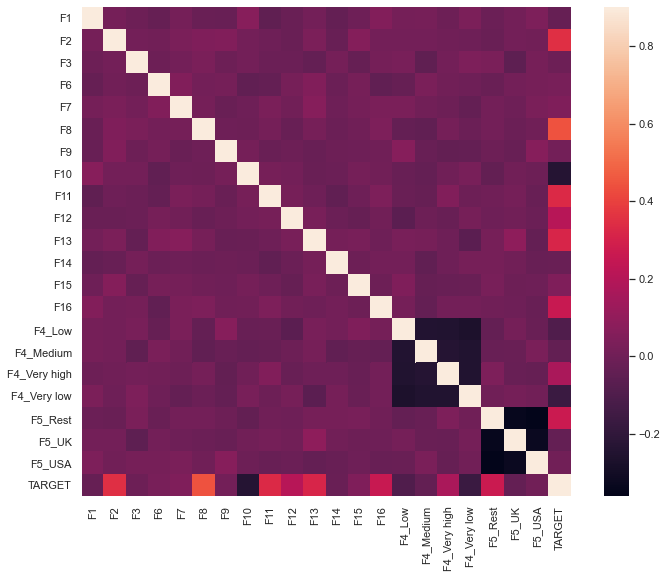

In [286]:
# Looks like the collinearity between any 2 variables is not present. 

corr_mat = data1.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat, vmax=0.9, square=True)

In [287]:
data_feat=data1.drop(['TARGET'],axis='columns')
data_class=data1['TARGET']

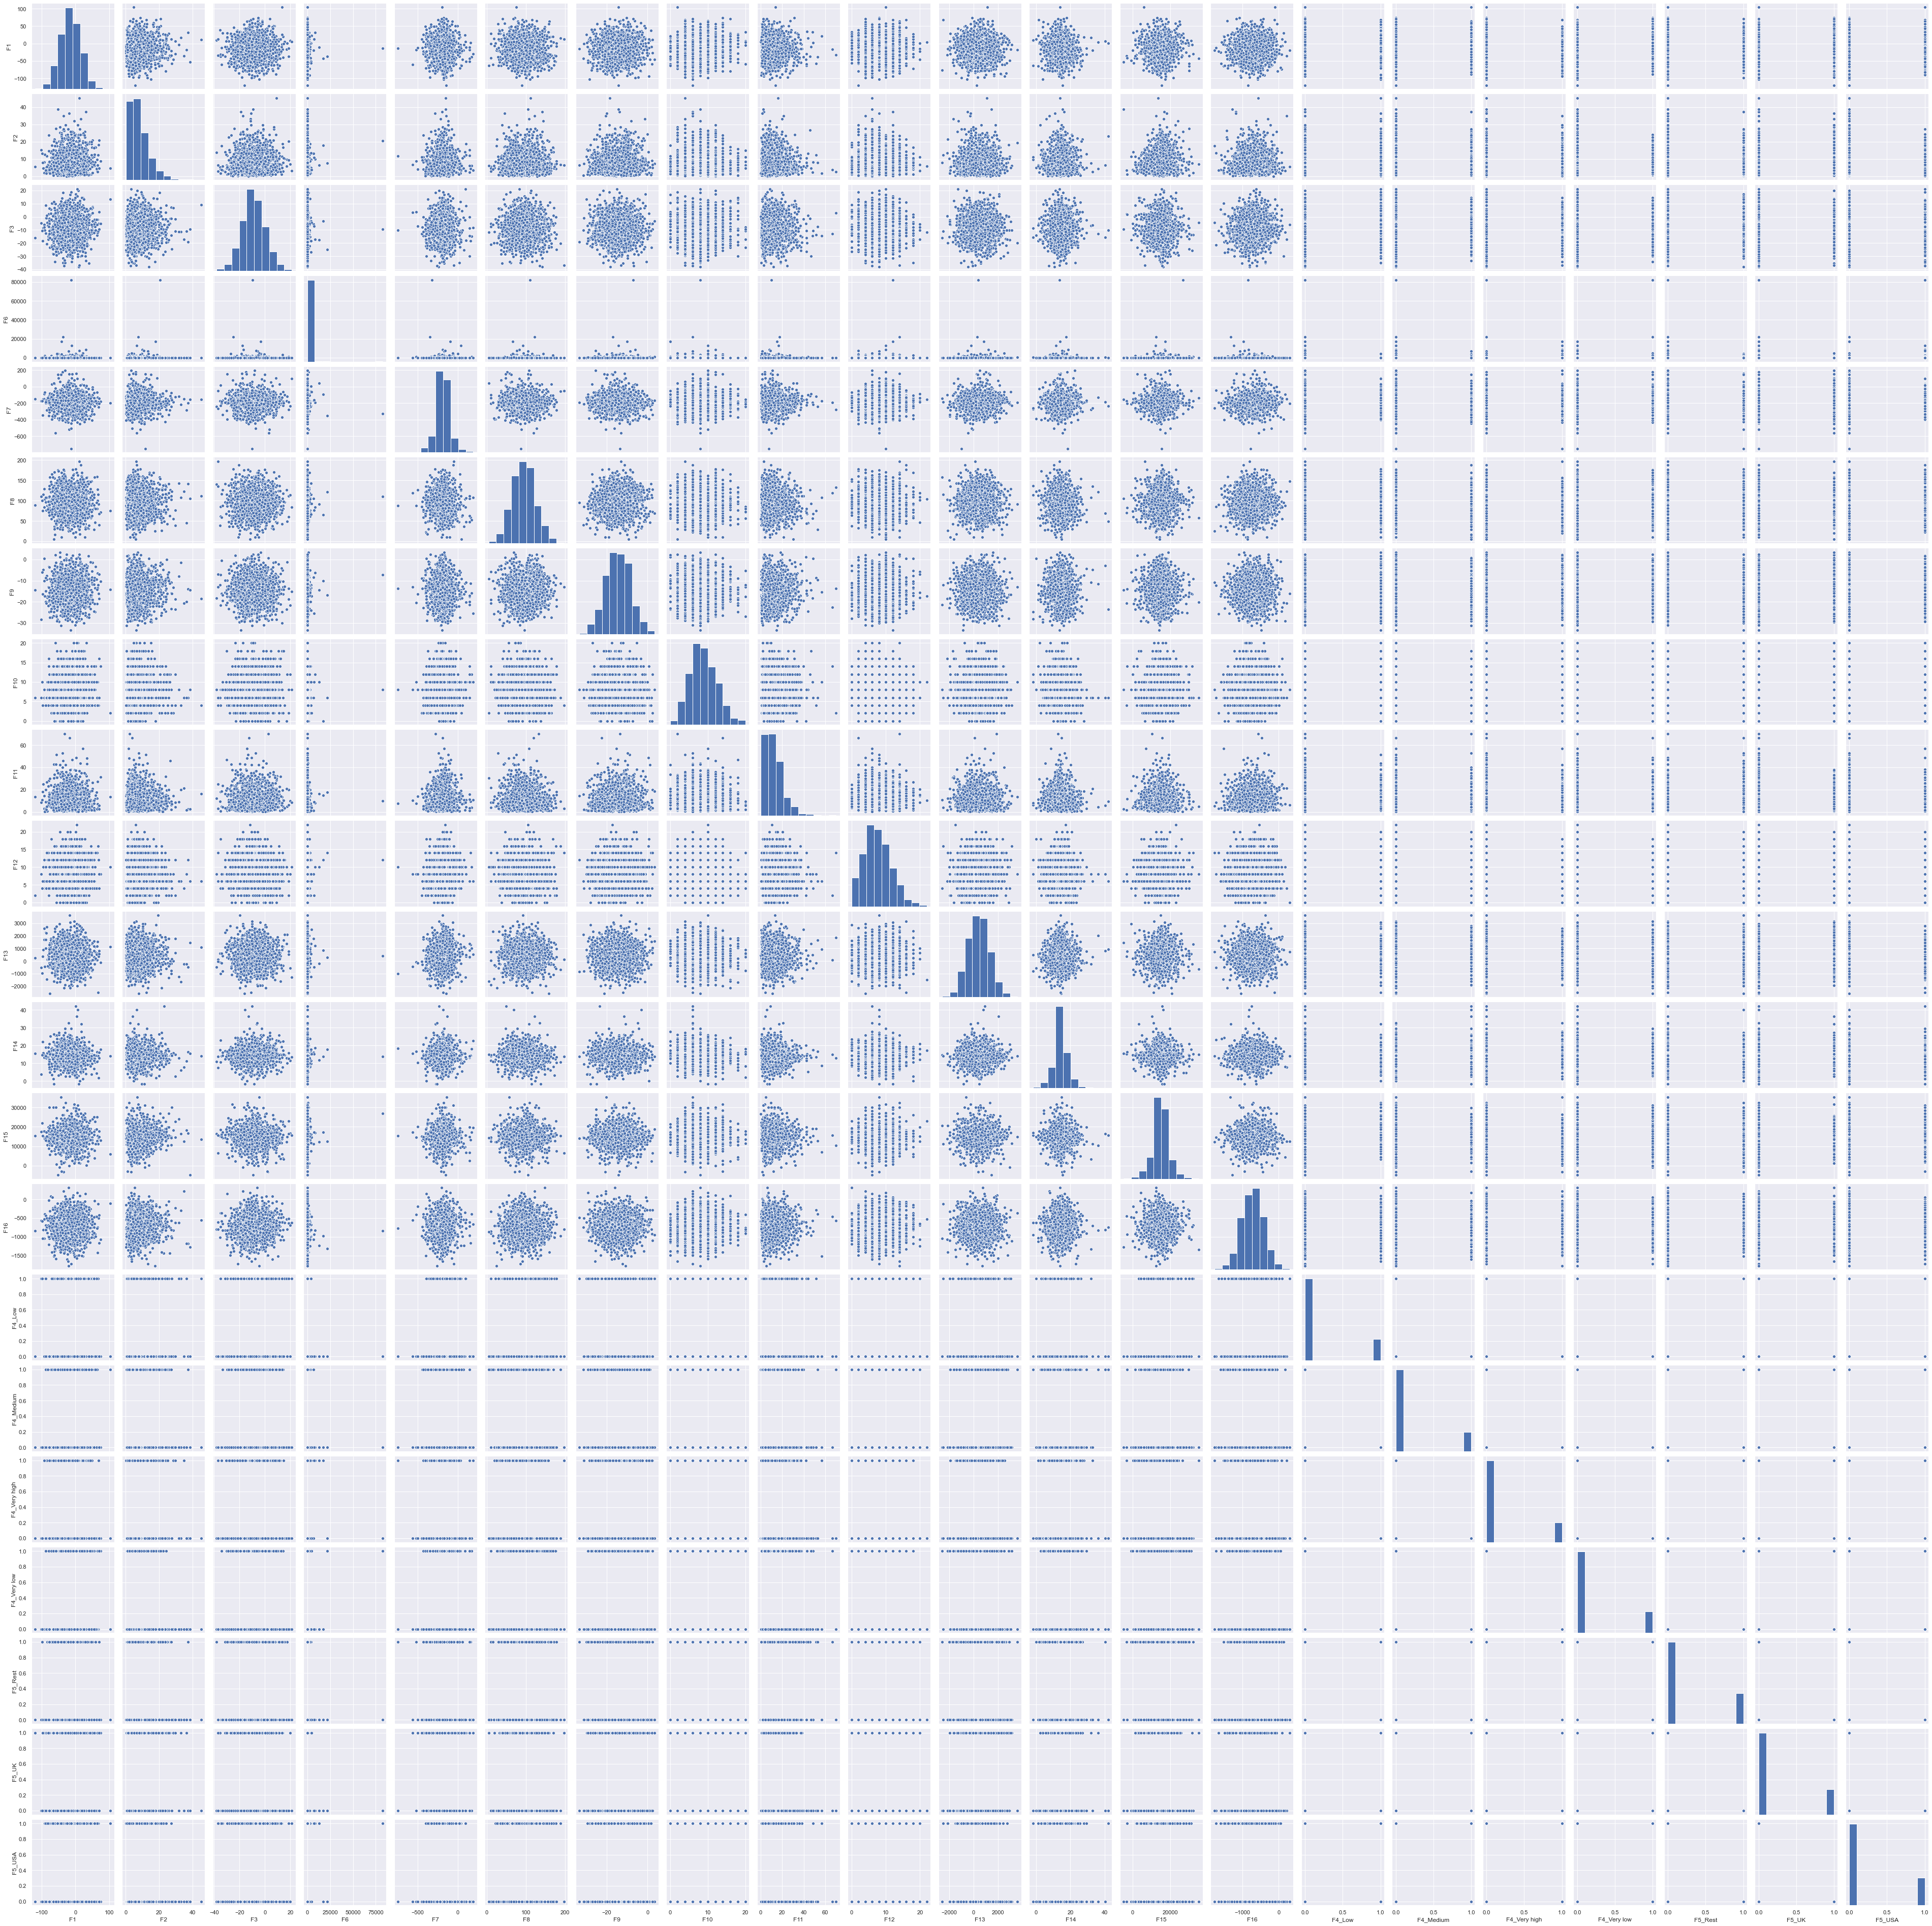

In [113]:
#even the pair plots tells us about the absence in linear relation between variables

sns.set()
sns.pairplot(data_feat, size = 2.5)
plt.show();

In [664]:
X=data1.drop(['TARGET'],axis=1)
y=data1['TARGET']

In [228]:
# I will add the constant, since we don't want the regression line to pass through zero.

#import statsmodels.api as sm  

#X_const = sm.add_constant(X) #Adding the intercept

#model = sm.OLS(y, X_const).fit() 
#predictions = model.predict(X_const)

# Print out the statistics
#model.summary()

### Multi-Collinearity Check using VIF

In [665]:
#We don't any of such feature that has a VIF>6 except the const. We dont look at the VIF of coonstant.

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_const = sm.add_constant(X) #Adding the intercept
#The python VIF calculator uses OLS by default and it doesn't add a constant, so we might want to add the constant. 

vif = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
pd.DataFrame({'vif': vif[:]}, index=X_const.columns).T

,const,F1,F2,F3,F6,F7,F8,F9,F10,F11,...,F14,F15,F16,F4_Low,F4_Medium,F4_Very high,F4_Very low,F5_Rest,F5_UK,F5_USA
vif,88.031705,1.022625,1.013373,1.01169,1.014748,1.014746,1.014702,1.018233,1.014441,1.013206,...,1.008617,1.01117,1.011861,1.641311,1.603279,1.598928,1.641679,1.588565,1.549993,1.577734


### Residuals have to be Linearly Distributed

Kolmogorov-Smirnov test ---- statistic: 0.5915, p-value: 0.0000


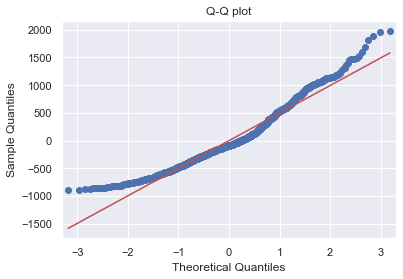

In [305]:
##Checking the distribution of residuals.
#Looks like the residuals are not normally distributed.One of our assumption has failed.

from scipy import stats

sm.ProbPlot(y-predictions).qqplot(line='s');
plt.title('Q-Q plot')

ks = stats.kstest(y-predictions, 'norm')
print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')

### The Features and Residuals have to be uncorrelated

In [669]:
# I will add the constant, since we don't want the regression line to pass through zero.

#import statsmodels.api as sm  

#X_const = sm.add_constant(X) #Adding the intercept

#model = sm.OLS(y, X).fit() 
#predictions = model.predict(X)

model = LinearRegression()
model.fit(X, y)

predictions= model.predict(X)

# Print out the statistics
#model.summary()

In [670]:
#Looks like there is no Correlation between Features and the Residuals.

from scipy.stats.stats import pearsonr

for i in X.columns:
    corr_test = pearsonr(X[i], y-predictions)
    print(f'Variable: {i} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')

Variable: F1 --- correlation: 0.0000, p-value: 1.0000
Variable: F2 --- correlation: 0.0000, p-value: 1.0000
Variable: F3 --- correlation: 0.0000, p-value: 1.0000
Variable: F6 --- correlation: -0.0000, p-value: 1.0000
Variable: F7 --- correlation: -0.0000, p-value: 1.0000
Variable: F8 --- correlation: 0.0000, p-value: 1.0000
Variable: F9 --- correlation: 0.0000, p-value: 1.0000
Variable: F10 --- correlation: 0.0000, p-value: 1.0000
Variable: F11 --- correlation: -0.0000, p-value: 1.0000
Variable: F12 --- correlation: 0.0000, p-value: 1.0000
Variable: F13 --- correlation: -0.0000, p-value: 1.0000
Variable: F14 --- correlation: 0.0000, p-value: 1.0000
Variable: F15 --- correlation: -0.0000, p-value: 1.0000
Variable: F16 --- correlation: -0.0000, p-value: 1.0000
Variable: F4_Low --- correlation: -0.0000, p-value: 1.0000
Variable: F4_Medium --- correlation: -0.0000, p-value: 1.0000
Variable: F4_Very high --- correlation: 0.0000, p-value: 1.0000
Variable: F4_Very low --- correlation: 0.0000,

<ipython-input-307-14eff91b4660>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


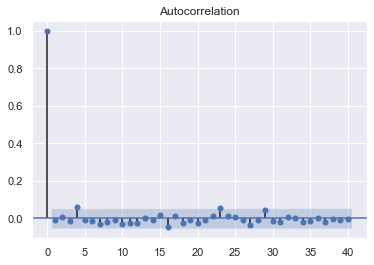

In [307]:
# It doesn't look like there is any kind of ACL in the residuals

import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(y-predictions, lags=40 , alpha=0.05)
acf.show()

In [310]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [318]:
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

X_train=StandardScaler(with_mean=False).fit_transform(X_train)
X_train.shape

(1096, 21)

In [319]:
X_test=StandardScaler(with_mean=False).fit_transform(X_test)
X_test.shape

(275, 21)

## Linear Regression 

In [331]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)#predicting the test set results
predict= lr.predict(X_test)
predict[:10] #The first 10 prediction

array([ 798.26161935, -205.76503179,  146.19420282, 2492.26122383,
       2830.42543602, 1814.38158713, 1855.79694037, 1873.04106398,
       1468.61009086, 1758.05001232])

In [350]:
#The coefficient of R-Square
lr.score(X_train,y_train)

0.795577238988584

In [334]:
#The coefficients
print(lr.coef_)

#Slope
print(lr.intercept_)

[  -4.77242514  352.22916742  -10.64660896   25.50521574  -20.55519577
  444.54798997   13.832001   -246.65775879  342.01138588  212.91739518
  288.70120343   -3.57357029   34.61899587  253.33535702 -125.92683757
  -69.24875651   61.62203591 -200.0244781   412.82080425  137.2268272
  216.80281811]
-1441.8755583490297


In [336]:
from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error: %.2f'% mean_squared_error(y_test, predict))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, predict))

Mean squared error: 295728.72
Coefficient of determination: 0.67


### Building the optimal model using Backward Elimination

In [522]:
#Now using the OLS technique to get some more information

X_const = sm.add_constant(X_train) #Adding the intercept

model = sm.OLS(y_train, X_const).fit() 
predictions = model.predict(sm.add_constant(X_test))

# Print out the statistics
model.summary()

#We want to eliminate all the features iteratively having the P value more than 5%.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     199.0
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        03:41:09   Log-Likelihood:                -8361.6
No. Observations:                1096   AIC:                         1.677e+04
Df Residuals:                    1074   BIC:                         1.688e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1441.8756    143.314    -10.061      0.000   -1723.082   -1160.669
x1            -4.7724     15.403     -0.310      0.757     -34.997      25.452
x2           352.2292     15.299     23.024      0.000     322.211     382.248
x3           -10.6466     15.313     -0.695      0.487     -40.693      19.399
x4            25.5052     15.343      1.662      0.097      -4.601      55.611
x5           -20.5552     15.308     -1.343      0.180     -50.593       9.482
x6           444.5480     15.284     29.085      0.000     414.558     474.538
x7            13.8320     15.367      0.900      0.368     -16.321      43.985
x8          -246.6578     15.312    -16.109      0.000    -276.703    -216.613
x9           342.0114     15.333     22.305      0.000     311.925     372.098
x10          212.9174     15.296     13.920      0.000     182.904     242.931
x11          288.7012     15.483     18.647      0.000     258.322     319.081
x12           -3.5736     15.310     -0.233      0.815     -33.615      26.468
x13           34.6190     15.284      2.265      0.024       4.629      64.609
x14          253.3354     15.345     16.509      0.000     223.225     283.445
x15         -125.9268     19.399     -6.491      0.000    -163.992     -87.862
x16          -69.2488     19.206     -3.606      0.000    -106.934     -31.564
x17           61.6220     19.134      3.220      0.001      24.077      99.167
x18         -200.0245     19.534    -10.240      0.000    -238.354    -161.695
x19          412.8208     19.188     21.514      0.000     375.170     450.471
x20          137.2268     18.930      7.249      0.000     100.083     174.371
x21          216.8028     19.073     11.367      0.000     179.378     254.228
==============================================================================
Omnibus:                       81.787   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.761
Skew:                           0.704   Prob(JB):                     3.58e-22
Kurtosis:                       3.424   Cond. No.                         82.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion
In the below step, using backward elimination, I iteratively removed the features with P-value>0.05. I did not get any amazing results, the R^2 remained almost the same. So I am including all the variables.

In [523]:
X1=data1.drop(['TARGET'],axis=1)

In [524]:
data1.columns

Index(['F1', 'F2', 'F3', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13',
       'F14', 'F15', 'F16', 'F4_Low', 'F4_Medium', 'F4_Very high',
       'F4_Very low', 'F5_Rest', 'F5_UK', 'F5_USA', 'TARGET'],
      dtype='object')

In [550]:
del X1[X1.columns[2]] 


In [551]:
X1.head()# These are the variables left after the backward elimination process. I emininated 22 feature to 16 features.

,F2,F6,F8,F10,F11,F12,F13,F15,F16,F4_Low,F4_Medium,F4_Very high,F4_Very low,F5_Rest,F5_UK,F5_USA
0,5.72,0.03,122.09,6,2.67,8,607.14,10523.40,-635.80,0,0,0,0,0,1,0
1,8.20,56.97,74.25,4,3.84,10,867.03,10037.04,-469.73,0,1,0,0,0,1,0
2,20.32,45.00,96.98,4,13.14,8,-153.66,15100.28,-662.31,1,0,0,0,1,0,0
3,2.76,0.12,42.45,12,1.29,6,1461.87,22518.15,-1100.35,0,0,0,0,1,0,0
4,9.98,557.61,76.25,8,2.58,2,-433.89,20111.46,-752.48,0,1,0,0,0,0,1


In [552]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y, test_size=0.2, random_state=0)

In [553]:
X_train1=StandardScaler(with_mean=False).fit_transform(X_train1)
X_train1.shape

(1096, 16)

In [554]:
X_test1=StandardScaler(with_mean=False).fit_transform(X_test1)
X_test1.shape

(275, 16)

In [555]:
#Eliminating X12 from the dataset.

X_const = sm.add_constant(X_train1) #Adding the intercept

model = sm.OLS(y_train1, X_const).fit() 
predictions = model.predict(sm.add_constant(X_test1))

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     261.4
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        03:45:51   Log-Likelihood:                -8363.4
No. Observations:                1096   AIC:                         1.676e+04
Df Residuals:                    1079   BIC:                         1.685e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1424.6025    113.270    -12.577      0.000   -1646.857   -1202.348
x1           352.6584     15.253     23.121      0.000     322.729     382.587
x2            25.2614     15.288      1.652      0.099      -4.736      55.259
x3           444.2794     15.264     29.106      0.000     414.328     474.231
x4          -247.2139     15.276    -16.183      0.000    -277.189    -217.239
x5           342.5036     15.244     22.467      0.000     312.591     372.416
x6           213.1825     15.268     13.963      0.000     183.225     243.140
x7           286.7436     15.414     18.603      0.000     256.499     316.988
x8            34.3298     15.264      2.249      0.025       4.380      64.279
x9           251.6603     15.265     16.486      0.000     221.707     281.613
x10         -126.3803     19.322     -6.541      0.000    -164.293     -88.467
x11          -70.0514     19.122     -3.663      0.000    -107.572     -32.531
x12           60.5314     19.082      3.172      0.002      23.088      97.974
x13         -201.6715     19.427    -10.381      0.000    -239.791    -163.552
x14          412.1299     19.150     21.521      0.000     374.555     449.705
x15          137.8851     18.894      7.298      0.000     100.812     174.958
x16          216.4836     18.986     11.402      0.000     179.230     253.737
==============================================================================
Omnibus:                       81.523   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.389
Skew:                           0.702   Prob(JB):                     4.32e-22
Kurtosis:                       3.425   Cond. No.                         52.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Decision Tree Regressor

In [592]:
X=data1.drop(['TARGET'],axis=1)
y=data1['TARGET']

In [593]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [594]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [604]:
def tuning(y_train,y_test,X_train,X_test): # Defining a function
    
    Dtree =DecisionTreeRegressor() 

    param = {'criterion':['mse', 'friedman_mse', 'mae', 'poisson'],
             'splitter':['best','random'],
            'max_depth':[1,2,3,4,5,6,7,8,9],
             'min_samples_split':[10,13,15,18,20,21,22,23,24,25,28,31,35,50]}
            
    
    randomDtree = RandomizedSearchCV(Dtree,param,cv=5,verbose=1,n_jobs=-1) 
    randomDtree.fit(X_train,y_train)
    
    print("Best HyperParameter: ",randomDtree.best_params_) 
    

In [605]:
tuning(y_train,y_test,X_train,X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best HyperParameter:  {'splitter': 'best', 'min_samples_split': 28, 'max_depth': 6, 'criterion': 'friedman_mse'}


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished


In [614]:
regressor = DecisionTreeRegressor(splitter='best',min_samples_split=28,max_depth=6,criterion='friedman_mse')
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=6,
                      min_samples_split=28)

In [619]:
#The R^2 Score
regressor.score(X_train,y_train)

0.6931535140038281

In [617]:
regressor.predict(X_test)[:10]

array([  36.06768707,   36.06768707,  614.07333333, 1307.17470588,
       2848.9525    ,  476.88238095, 1081.552     , 2139.78580645,
        558.68867647,  558.68867647])

In [620]:
#The MSE is a lot higher if compared to that of Multiple Linear Regression
mean_squared_error(y_test,regressor.predict(X_test))

655834.3640384336

## Random Forest Regressor

In [621]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [636]:
from sklearn.ensemble import RandomForestRegressor

In [638]:
def tuningRD(y_train,y_test,X_train,X_test): # Defining a function
    
    RF =RandomForestRegressor()

    param = {'n_estimators':[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
        'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
            'max_depth':[1,2,3,4,5,6,7,8,9],
             'min_samples_split':[10,13,15,18,20,21,22,23,24,25,28,31,35,50]}
            
    
    randomRF = RandomizedSearchCV(RF,param,cv=5,verbose=1,n_jobs=-1) 
    randomRF.fit(X_train,y_train)
    
    print("Best HyperParameter: ",randomRF.best_params_) 
    

In [640]:
tuningRD(y_train,y_test,X_train,X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.8s finished


Best HyperParameter:  {'n_estimators': 40, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'mse'}


In [641]:
RandomForest =RandomForestRegressor(n_estimators=40, min_samples_split= 10, max_features= 'auto', max_depth= 5, criterion= 'mse')

In [642]:
RandomForest.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_split=10, n_estimators=40)

In [644]:
RandomForest.predict(X_test)[:10]

array([ 282.01304227,  130.78193411,  900.86596132, 1357.89145408,
       1865.82592345,  834.49375964, 1844.57501131, 1751.87834789,
        670.8523765 ,  696.22539021])

In [647]:
RandomForest.score(X_train,y_train)

0.7519548227038964

In [648]:
mean_squared_error(y_test,RandomForest.predict(X_test))

412177.4785127784

In [703]:
from tabulate import tabulate 

values1 = {'Algorithm':['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor'], 
        'R^2':['0.796','0.6931' ,'0.75195'], 
        'MSE':['295728.72', '655834.36', '412177.4785127784'],
       } 

df2 = pd.DataFrame(values1) 
  
# displaying the DataFrame 
print(tabulate(df2, headers = 'keys', tablefmt = 'psql')) 

+----+-------------------------+---------+--------+
|    | Algorithm               |     R^2 |    MSE |
|----+-------------------------+---------+--------|
|  0 | Linear Regression       | 0.796   | 295729 |
|  1 | Decision Tree Regressor | 0.6931  | 655834 |
|  2 | Random Forest Regressor | 0.75195 | 412177 |
+----+-------------------------+---------+--------+


# 3(B) Testing the model with new data.

In [695]:
test_set=pd.read_csv(r'C:\Users\gnr04\Desktop\Srikanth\MS\Machine Leanrning and Data Mining\Assignment\CE802_P3_Data\CE802_P3_Test.csv')

In [677]:
test_set.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.37,4.22,-4.05,Very high,UK,83.43,-209.02,101.94,-17.16,2,7.89,10,2373.57,13.11,30843.16,-962.72,NaN
1,-39.37,7.72,-3.48,Very low,Rest,48.30,86.62,107.56,-11.00,18,1.86,10,1475.76,11.71,15657.13,-305.24,NaN
2,16.25,7.08,-5.31,Very low,Europe,1.98,-267.34,23.33,-14.66,8,25.92,6,192.93,17.60,10765.05,-857.16,NaN
3,23.08,5.82,-5.91,Very low,UK,11.49,-196.52,115.19,-12.14,2,12.87,0,2779.23,13.59,14778.80,-798.06,NaN
4,-21.30,15.14,-4.02,Medium,USA,0.60,-80.36,75.42,-8.86,10,4.26,8,-441.42,13.62,16328.25,-832.93,NaN


In [679]:
test_set1=pd.get_dummies(test_set, columns=["F4", "F5"],drop_first=True)

In [681]:
test_set1.head()

,F1,F2,F3,F6,F7,F8,F9,F10,F11,F12,...,F15,F16,Target,F4_Low,F4_Medium,F4_Very high,F4_Very low,F5_Rest,F5_UK,F5_USA
0,-39.37,4.22,-4.05,83.43,-209.02,101.94,-17.16,2,7.89,10,...,30843.16,-962.72,NaN,0,0,1,0,0,1,0
1,-39.37,7.72,-3.48,48.30,86.62,107.56,-11.00,18,1.86,10,...,15657.13,-305.24,NaN,0,0,0,1,1,0,0
2,16.25,7.08,-5.31,1.98,-267.34,23.33,-14.66,8,25.92,6,...,10765.05,-857.16,NaN,0,0,0,1,0,0,0
3,23.08,5.82,-5.91,11.49,-196.52,115.19,-12.14,2,12.87,0,...,14778.80,-798.06,NaN,0,0,0,1,0,1,0
4,-21.30,15.14,-4.02,0.60,-80.36,75.42,-8.86,10,4.26,8,...,16328.25,-832.93,NaN,0,1,0,0,0,0,1


In [682]:
del test_set1['Target']

In [686]:
test_set1.shape

(1500, 21)

# Using Linear Regression for Testing the data.

In [688]:
#Standardization of the data

test_std=StandardScaler(with_mean=False).fit_transform(test_set1)

In [692]:
#Using the Multiple Regression Technique to predict the new dataset.

Target=lr.predict(test_std)

In [698]:
Target

array([1770.61149686,  798.2796125 , -850.48407831, ...,   69.60491575,
       2795.57615505,  795.52999413])

In [696]:
test_set['Target']=Target

In [699]:
test_set.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.37,4.22,-4.05,Very high,UK,83.43,-209.02,101.94,-17.16,2,7.89,10,2373.57,13.11,30843.16,-962.72,1770.611497
1,-39.37,7.72,-3.48,Very low,Rest,48.30,86.62,107.56,-11.00,18,1.86,10,1475.76,11.71,15657.13,-305.24,798.279612
2,16.25,7.08,-5.31,Very low,Europe,1.98,-267.34,23.33,-14.66,8,25.92,6,192.93,17.60,10765.05,-857.16,-850.484078
3,23.08,5.82,-5.91,Very low,UK,11.49,-196.52,115.19,-12.14,2,12.87,0,2779.23,13.59,14778.80,-798.06,1165.524870
4,-21.30,15.14,-4.02,Medium,USA,0.60,-80.36,75.42,-8.86,10,4.26,8,-441.42,13.62,16328.25,-832.93,187.716891


In [700]:
CE802_P3_TestNew=test_set.to_csv(r'C:\Users\gnr04\Desktop\Srikanth\MS\Machine Leanrning and Data Mining\Assignment\CE802_P3_TestRegression.csv')